In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SMOTE

In [2]:
X_train = pd.read_csv("X_Train_SMOTE.csv")
y_train = pd.read_csv("y_train_SMOTE.csv")
X_test = pd.read_csv("test_x.csv")
y_test = pd.read_csv("test_labels.csv")

In [6]:
# X_train = X_train.drop(columns=['Unnamed: 0'])

In [7]:
# y_train = y_train.drop(columns=['Unnamed: 0'])

In [8]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [9]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

model.fit(X_train,y_train)

param_grid = {
                'n_estimators': [5, 10, 20, 30, 40, 50],
                'max_depth': [2, 7, 12, 17],
                'criterion': ["entropy"],
                'random_state': [0],
             }

grid_clf1 = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_clf1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 7, 12, 17],
                         'n_estimators': [5, 10, 20, 30, 40, 50],
                         'random_state': [0]})

In [10]:
grid_clf1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=50,
                       random_state=0)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score

pred=grid_clf1.best_estimator_.predict(X_test)
cm=confusion_matrix(y_test,pred)
AS=accuracy_score(y_test,pred)

print(cm)
print(AS)

[[158   1   0   3]
 [  1   4   2   0]
 [  1   2   3   0]
 [  0   1   2   6]]
0.9293478260869565


In [12]:
from sklearn.metrics import recall_score
recall_score(y_test,pred, average=None)

array([0.97530864, 0.57142857, 0.5       , 0.66666667])

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test,pred, average=None)

array([0.9875    , 0.5       , 0.42857143, 0.66666667])

<AxesSubplot:>

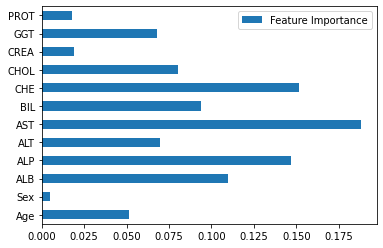

In [14]:
# Check feature importance
feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(X_train)).plot(kind='barh')

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LG = LogisticRegression(random_state=0, solver = 'liblinear')

LG.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
model_LG= LG

pred_LG=model_LG.predict(X_test)
cm=confusion_matrix(y_test,pred_LG)
AS_LG=accuracy_score(y_test,pred_LG)

print(cm)
print(AS_LG)

[[159   2   1   0]
 [  0   4   2   1]
 [  1   1   4   0]
 [  1   0   3   5]]
0.9347826086956522


In [17]:
from sklearn.metrics import recall_score
recall_score(y_test,pred_LG, average=None)

array([0.98148148, 0.57142857, 0.66666667, 0.55555556])

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test,pred_LG, average=None)

array([0.98757764, 0.57142857, 0.4       , 0.83333333])

# not SMOTE

In [19]:
X_train = pd.read_csv("train_x.csv")
y_train = pd.read_csv("train_labels.csv")
X_test = pd.read_csv("test_x.csv")
y_test = pd.read_csv("test_labels.csv")

In [20]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

model.fit(X_train,y_train)

param_grid = {
                'n_estimators': [5, 10, 20, 30, 40, 50],
                'max_depth': [2, 7, 12, 17],
                'criterion': ["entropy"],
                'random_state': [0],
             }

grid_clf1 = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_clf1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 7, 12, 17],
                         'n_estimators': [5, 10, 20, 30, 40, 50],
                         'random_state': [0]})

In [22]:
grid_clf1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=50,
                       random_state=0)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

pred=grid_clf1.best_estimator_.predict(X_test)
cm=confusion_matrix(y_test,pred)
AS=accuracy_score(y_test,pred)

print(cm)
print(AS)

[[162   0   0   0]
 [  2   4   1   0]
 [  2   0   4   0]
 [  2   1   2   4]]
0.9456521739130435


In [24]:
from sklearn.metrics import recall_score
recall_score(y_test,pred, average=None)

array([1.        , 0.57142857, 0.66666667, 0.44444444])

In [25]:
from sklearn.metrics import precision_score
precision_score(y_test,pred, average=None)

array([0.96428571, 0.8       , 0.57142857, 1.        ])

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LG = LogisticRegression(random_state=0, solver = 'liblinear')

LG.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
model_LG= LG

pred_LG=model_LG.predict(X_test)
cm=confusion_matrix(y_test,pred_LG)
AS_LG=accuracy_score(y_test,pred_LG)

print(cm)
print(AS_LG)

[[161   1   0   0]
 [  2   4   1   0]
 [  1   2   3   0]
 [  1   1   2   5]]
0.9402173913043478


In [28]:
from sklearn.metrics import recall_score
recall_score(y_test,pred_LG, average=None)

array([0.99382716, 0.57142857, 0.5       , 0.55555556])

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test,pred_LG, average=None)

array([0.97575758, 0.5       , 0.5       , 1.        ])